In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("./TableS3_hamming", sep="\t", index_col=0 )
df.head()

,Siciliano,Calabrese_Northern,Italian,Spanish,French,Portuguese,Romanian,Greek_Calabria,Greek,Greek_Cypriot,...,Kazakh,Kirghiz,Turkish,Buryat,Basque_Central,Basque_Western,Wolof,Malagasy,Archi,Lak
Siciliano,0.000,0.075,0.046,0.094,0.100,0.062,0.113,0.129,0.183,0.183,...,0.306,0.306,0.306,0.256,0.265,0.286,0.356,0.350,0.270,0.270
Calabrese_Northern,0.075,0.000,0.062,0.109,0.150,0.109,0.097,0.113,0.167,0.167,...,0.306,0.306,0.306,0.282,0.265,0.286,0.378,0.350,0.270,0.270
Italian,0.046,0.062,0.000,0.091,0.098,0.061,0.094,0.150,0.180,0.180,...,0.306,0.306,0.306,0.256,0.265,0.286,0.378,0.350,0.270,0.270
Spanish,0.094,0.109,0.091,0.000,0.098,0.045,0.125,0.153,0.150,0.150,...,0.278,0.278,0.278,0.282,0.229,0.250,0.409,0.375,0.278,0.278
French,0.100,0.150,0.098,0.098,0.000,0.082,0.133,0.161,0.175,0.175,...,0.314,0.314,0.314,0.308,0.277,0.292,0.381,0.310,0.297,0.297


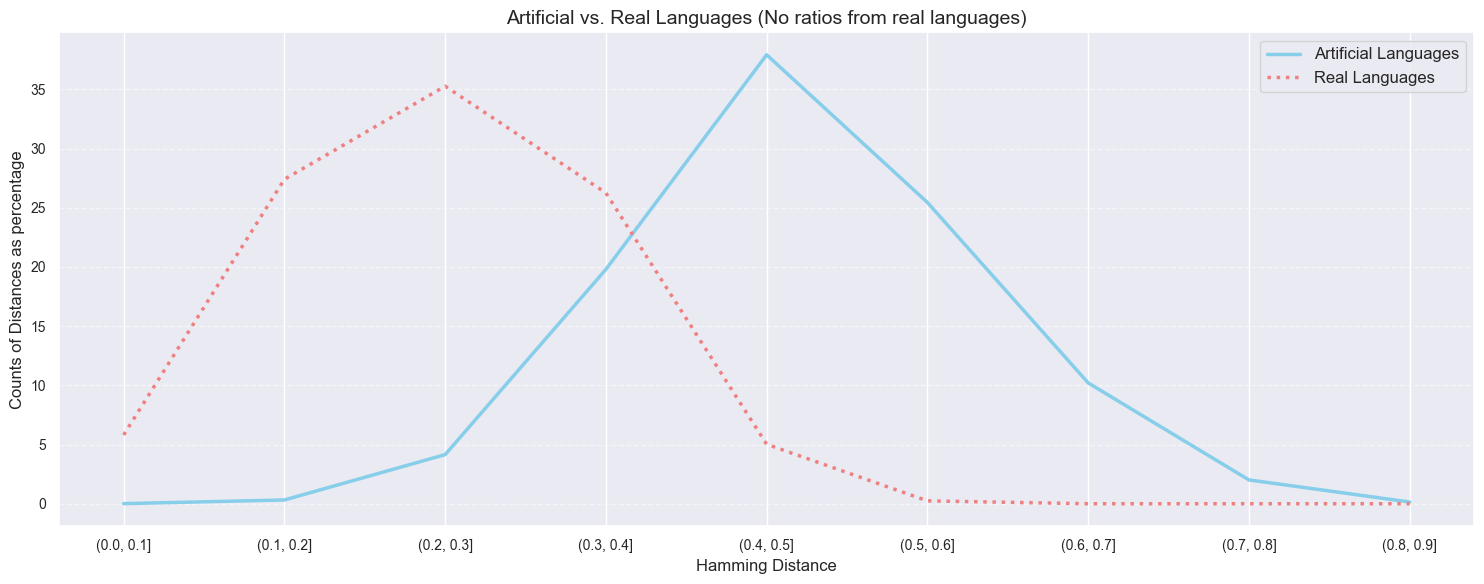

In [18]:
art = pd.read_csv("./Artificial_Langs/random_distances_hamming_05.txt", names=["dist"])
distance_counts = art['dist'].value_counts()
distance_counts = distance_counts.sort_values(ascending=False)

df = pd.read_csv("./TableS3_hamming", sep="\t", index_col=0)

df = df.melt()
distance_counts_real = df['value'].value_counts()
distance_counts_real = distance_counts_real.sort_values(ascending=False)


# Set the custom x-axis ticks
art['dist_bin'] = pd.cut(art['dist'], np.arange(0,1,0.1))
df['dist_bin'] = pd.cut(df['value'], np.arange(0,1,0.1))

# Count the occurrences of each bin
bin_counts = art['dist_bin'].value_counts()
bin_counts = round(bin_counts * 100 / 12497500, 3)
sorted_dist_bin_counts = bin_counts.sort_index()

bin_counts_df = df['dist_bin'].value_counts()
bin_counts_df = round(bin_counts_df * 100 / 3306, 3)
sorted_dist_bin_counts_df = bin_counts_df.sort_index()

sns.set_theme()  # Or choose a specific seaborn style
# sns.set_style("whitegrid") # Or choose another seaborn style

plt.figure(figsize=(15, 6))

# Use a color palette for better differentiation
colors = ["skyblue", "lightcoral"]

# Adjust line styles for clarity
sorted_dist_bin_counts.plot(label="Artificial Languages", color=colors[0], linewidth=2.5, linestyle="-")
sorted_dist_bin_counts_df.plot(label="Real Languages", color=colors[1], linewidth=2.5, linestyle=":")

# Improve axis labels and title
plt.xlabel('Hamming Distance', fontsize=12)
plt.ylabel('Counts of Distances as percentage', fontsize=12)
plt.title('Artificial vs. Real Languages (No ratios from real languages)', fontsize=14)

# Make gridlines lighter and adjust ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend customization for better readability
plt.legend(fontsize=12, loc='upper right')  # Place in a better location

# Add annotations for key points (optional)
# max_artificial_dist = sorted_dist_bin_counts.idxmax()
# plt.axvline(x=max_artificial_dist, color=colors[0], linestyle="--", linewidth=1)
# plt.text(max_artificial_dist, 0.05, f'Max: {max_artificial_dist:.0f}', color=colors[0], ha='center')

# Similar for max_real_dist

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('art_real_no_ratios.png', dpi=300)  # Save as PNG with higher resolution

plt.show()

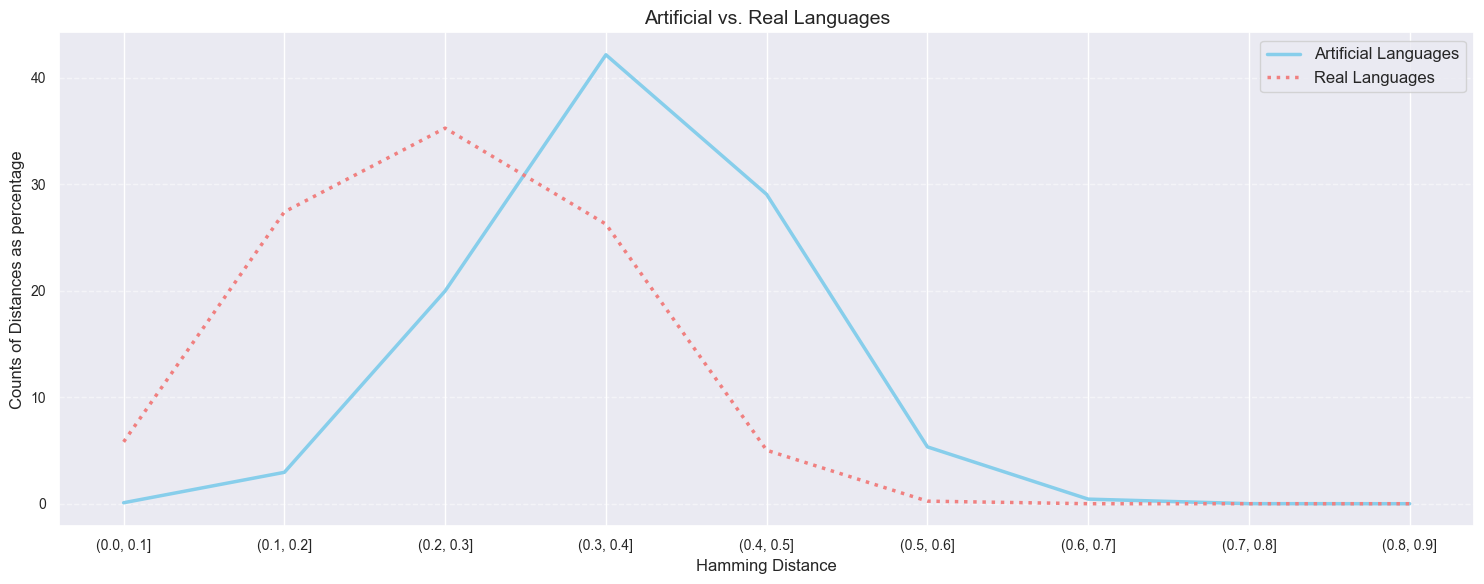

In [17]:
art = pd.read_csv("./Artificial_Langs/random_distances_hamming_one_language.txt", names=["dist"])
distance_counts = art['dist'].value_counts()
distance_counts = distance_counts.sort_values(ascending=False)

df = pd.read_csv("./TableS3_hamming", sep="\t", index_col=0)

df = df.melt()
distance_counts_real = df['value'].value_counts()
distance_counts_real = distance_counts_real.sort_values(ascending=False)


# Set the custom x-axis ticks
art['dist_bin'] = pd.cut(art['dist'], np.arange(0,1,0.1))
df['dist_bin'] = pd.cut(df['value'], np.arange(0,1,0.1))

# Count the occurrences of each bin
bin_counts = art['dist_bin'].value_counts()
bin_counts = round(bin_counts * 100 / 12497500, 3)
sorted_dist_bin_counts = bin_counts.sort_index()

bin_counts_df = df['dist_bin'].value_counts()
bin_counts_df = round(bin_counts_df * 100 / 3306, 3)
sorted_dist_bin_counts_df = bin_counts_df.sort_index()

sns.set_theme()  # Or choose a specific seaborn style
# sns.set_style("whitegrid") # Or choose another seaborn style

plt.figure(figsize=(15, 6))

# Use a color palette for better differentiation
colors = ["skyblue", "lightcoral"]

# Adjust line styles for clarity
sorted_dist_bin_counts.plot(label="Artificial Languages", color=colors[0], linewidth=2.5, linestyle="-")
sorted_dist_bin_counts_df.plot(label="Real Languages", color=colors[1], linewidth=2.5, linestyle=":")

# Improve axis labels and title
plt.xlabel('Hamming Distance', fontsize=12)
plt.ylabel('Counts of Distances as percentage', fontsize=12)
plt.title('Artificial vs. Real Languages', fontsize=14)

# Make gridlines lighter and adjust ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Lighter gridlines
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend customization for better readability
plt.legend(fontsize=12, loc='upper right')  # Place in a better location

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('art_real__one_language.png', dpi=300)  # Save as PNG with higher resolution

plt.show()